In [1]:
import pandas as pd
import networkx as nx
import itertools
import markov_clustering as mc
import numpy as np
import matplotlib.pyplot as plt

tag_2018=pd.read_csv(r"C:\Users\moonp\ASAC과정\ASAC_ml_project\web_crawling\LSH\steampy\appid_2018.csv",sep='\t')
tag_2019=pd.read_csv(r"C:\Users\moonp\ASAC과정\ASAC_ml_project\web_crawling\LSH\steampy\appid_2019.csv",sep='\t')
tag_2020=pd.read_csv(r"C:\Users\moonp\ASAC과정\ASAC_ml_project\web_crawling\LSH\steampy\appid_2020.csv",sep='\t')
tag_2021=pd.read_csv(r"C:\Users\moonp\ASAC과정\ASAC_ml_project\web_crawling\LSH\steampy\appid_2021.csv",sep='\t')
tag_2022=pd.read_csv(r"C:\Users\moonp\ASAC과정\ASAC_ml_project\web_crawling\LSH\steampy\appid_2022.csv",sep='\t')

In [2]:
total=pd.concat([tag_2018,tag_2019,tag_2020,tag_2021,tag_2022],ignore_index=True)

In [3]:
total

,developer,publisher,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,languages,tags,genre,appid,num_lang
0,Ludeon Studios,Ludeon Studios,157344,3038,12492,1401,5368,921,34.99,34.99,"English, French, German, Polish, Russian, Ital...","{'Colony Sim': 3516, 'Base-Building': 3435, 'S...","Indie, Simulation, Strategy",294100,35
1,Ninja Kiwi,Ninja Kiwi,246979,6441,4018,277,1532,62,13.99,13.99,"English, French, Italian, German, Danish, Finn...","{'Tower Defense': 813, 'Strategy': 730, 'Multi...",Strategy,960090,24
2,"Extremely OK Games, Ltd.",Maddy Makes Games Inc.,71428,1686,1316,310,370,582,19.99,19.99,"English, French, Italian, German, Spanish - Sp...","{'Precision Platformer': 1031, 'Difficult': 10...","Action, Adventure, Indie",504230,14
3,Motion Twin,Motion Twin,128085,3722,1841,183,868,213,14.99,24.99,"English, French, Simplified Chinese, Italian, ...","{'Adventure': 3912, 'Action Roguelike': 3500, ...","Action, Adventure, Indie",588650,21
4,Unknown Worlds Entertainment,Unknown Worlds Entertainment,221972,7800,1943,313,941,277,29.99,29.99,"English, French, German, Polish, Russian, Simp...","{'Open World Survival Craft': 6649, 'Survival'...","Adventure, Indie",264710,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46718,Sharktales.,WASABI entertainment,0,0,0,0,0,0,14.99,14.99,"Japanese, English, Simplified Chinese",[],"Adventure, Indie",1995280,4
46719,Do Games Limited,Do Games Limited,0,11,0,0,0,0,9.99,9.99,English,"{'Hidden Object': 365, 'Mystery': 364, 'Advent...","Adventure, Casual",2098860,1
46720,NaN,NaN,0,0,0,0,0,0,0.00,0.00,NaN,[],NaN,2154770,0
46721,Maker Games,Maker Games,0,16,0,0,0,0,2.99,2.99,English,"{'Action': 63, 'First-Person': 37, 'Horror': 3...","Action, Indie",1915410,1


In [4]:
t_genre=pd.DataFrame(total["genre"])

In [5]:
edge_list=[]
for i in range(len(t_genre)):
    edge_list.append([t_genre.iloc[i,0]])

In [6]:
edge_list

[['Indie, Simulation, Strategy'],
 ['Strategy'],
 ['Action, Adventure, Indie'],
 ['Action, Adventure, Indie'],
 ['Adventure, Indie'],
 ['Action, Indie'],
 ['Action, Indie'],
 ['Adventure, Indie'],
 ['Adventure, RPG, Strategy'],
 ['Action, Adventure, Indie, RPG, Simulation, Early Access'],
 ['Casual, Indie'],
 ['Adventure, Indie, RPG'],
 ['Action, Adventure, Indie, Simulation'],
 ['Adventure, Indie'],
 ['Adventure, Free to Play, Indie'],
 ['Adventure, Casual, Indie, RPG'],
 ['Action, Free to Play, Indie'],
 ['Action, Adventure, RPG'],
 ['Casual, Indie'],
 ['Adventure, Casual, Simulation'],
 ['Action, Indie, RPG, Simulation, Strategy'],
 ['Adventure, Indie'],
 ['Casual, Indie'],
 ['Action, Indie, Sports'],
 ['Casual'],
 ['Indie, RPG'],
 ['Casual, Free to Play, Indie'],
 ['Adventure'],
 ['Adventure'],
 ['Action, Indie'],
 ['Adventure'],
 ['Action, Adventure, Casual, Free to Play, Indie, Simulation, Early Access'],
 ['Simulation'],
 ['Casual, Indie, Simulation'],
 ['Action, Casual, Free to

In [7]:
edge_dict=dict()
for i in range(len(edge_list)):
    a=str(edge_list[i]).replace(" ","").split(",")
    for j in range(len(a)):
        a[j]=a[j].strip("[]")
        a[j]=a[j].strip("'")
        edge_dict[a[j]]=0

In [8]:
for i in range(len(edge_list)):
    a=str(edge_list[i]).replace(" ","").split(",")
    for j in range(len(a)):
        a[j]=a[j].strip("[]")
        a[j]=a[j].strip("'")
        edge_dict[a[j]]+=1

In [9]:
node_list=list(edge_dict.keys())

In [10]:
len(node_list)

35

In [11]:
g2 = nx.Graph()

In [12]:
for k in edge_dict:
    g2.add_node(k)

In [13]:
start,end=[],[]
edges=[]
for i in range(len(edge_list)):
    a=str(edge_list[i]).replace(" ","").split(",")
    for j in range(len(a)):
        a[j]=a[j].strip("[]")
        a[j]=a[j].strip("'")
        edge_dict[a[j]]+=1
    b=itertools.combinations(a,2)
    edges.append(list(b))
    

In [14]:
edges[0][0][1]

'Simulation'

In [15]:
for k in edge_dict:
    g2.add_node(k)
for i in range(len(edges)):
    for j in range(len(edges[i])):
        g2.add_edge(edges[i][j][0],edges[i][j][1],weight=0.01)
        start.append(edges[i][j][0])
        end.append(edges[i][j][1])

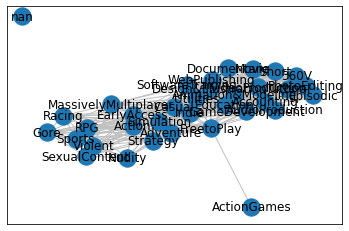

In [16]:
nx.draw_networkx(g2,pos=nx.spring_layout(g2),edge_color="silver")

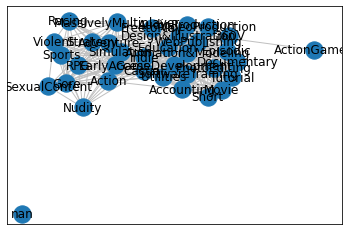

In [17]:
# g2.remove_node("nan")
# g2.remove_node("Education")
# g2.remove_node("Early Access")
nx.draw_networkx(g2,pos=nx.spring_layout(g2),edge_color="silver")

In [18]:
d = dict(g2.degree)

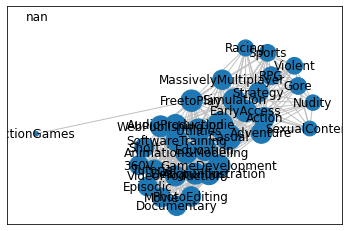

In [19]:
nx.draw_networkx(g2,pos=nx.spring_layout(g2),node_size=[v * 20 for v in d.values()],edge_color="silver")

In [20]:
A = nx.to_numpy_array(g2,nodelist=node_list)
result = mc.run_mcl(A)
clusters = mc.get_clusters(result)

In [21]:
for i in range(len(result)):
    print(result[i])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 

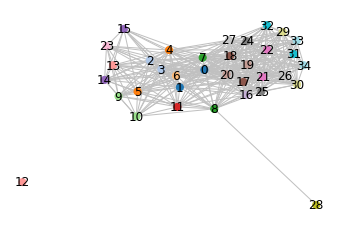

In [22]:
mc.draw_graph(A, clusters, node_size=50, with_labels=True, edge_color="silver")

In [23]:
A

array([[0.  , 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.01, 0.01],
       [0.01, 0.  , 0.  , ..., 0.01, 0.  , 0.01],
       [0.01, 0.  , 0.  , ..., 0.01, 0.01, 0.  ]])

In [24]:
clusters

[(0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (5,),
 (6,),
 (7,),
 (8,),
 (9,),
 (10,),
 (11,),
 (12,),
 (13,),
 (14,),
 (15,),
 (16,),
 (17,),
 (18,),
 (19,),
 (20,),
 (21,),
 (22,),
 (23,),
 (24,),
 (25,),
 (26,),
 (27,),
 (28,),
 (29,),
 (30,),
 (31,),
 (32,),
 (33,),
 (34,)]

In [25]:
edge_weight=dict()
for i in range(len(start)):
    edge_weight[start[i]+";"+end[i]]=0
for i in range(len(start)):
    edge_weight[start[i]+";"+end[i]]+=1

In [26]:
edge_weight

{'Indie;Simulation': 6680,
 'Indie;Strategy': 6347,
 'Simulation;Strategy': 2895,
 'Action;Adventure': 8357,
 'Action;Indie': 14364,
 'Adventure;Indie': 13991,
 'Adventure;RPG': 4890,
 'Adventure;Strategy': 2665,
 'RPG;Strategy': 2189,
 'Action;RPG': 3304,
 'Action;Simulation': 2727,
 'Action;EarlyAccess': 2734,
 'Adventure;Simulation': 3153,
 'Adventure;EarlyAccess': 1924,
 'Indie;RPG': 6137,
 'Indie;EarlyAccess': 3989,
 'RPG;Simulation': 1829,
 'RPG;EarlyAccess': 1353,
 'Simulation;EarlyAccess': 1513,
 'Casual;Indie': 15379,
 'Adventure;FreetoPlay': 925,
 'FreetoPlay;Indie': 1842,
 'Adventure;Casual': 6984,
 'Casual;RPG': 2614,
 'Action;FreetoPlay': 1171,
 'Casual;Simulation': 4644,
 'Action;Strategy': 2452,
 'Action;Sports': 993,
 'Indie;Sports': 1438,
 'Casual;FreetoPlay': 1182,
 'Action;Casual': 6171,
 'Casual;EarlyAccess': 1735,
 'FreetoPlay;Simulation': 529,
 'FreetoPlay;EarlyAccess': 386,
 'FreetoPlay;RPG': 592,
 'Casual;Strategy': 3960,
 'FreetoPlay;Strategy': 606,
 'Indie;Rac

In [27]:
tmp1=list(edge_weight.keys())
tmp2=list(edge_weight.values())

In [28]:
max(tmp2)

15379

In [29]:
tmp1[0].split(";")

['Indie', 'Simulation']

In [30]:
max(tmp2)

15379

In [31]:
G = nx.Graph()
for i in range(len(tmp1)):
    a=tmp1[i].split(";")
    G.add_edge(a[0],a[1],weight=tmp2[i]/15379)

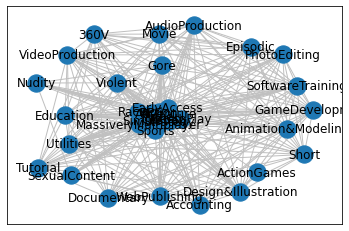

In [32]:
nx.draw_networkx(G,pos=nx.spring_layout(G),edge_color="silver")

In [33]:
edge_labels = nx.get_edge_attributes(G,'weight')

In [34]:
edge_labels

{('Indie', 'Simulation'): 0.4343585408674166,
 ('Indie', 'Strategy'): 0.41270563755770856,
 ('Indie', 'Action'): 0.9340009103322713,
 ('Indie', 'Adventure'): 0.9097470576760518,
 ('Indie', 'RPG'): 0.3990506534885233,
 ('Indie', 'EarlyAccess'): 0.259379673580857,
 ('Indie', 'Casual'): 1.0,
 ('Indie', 'FreetoPlay'): 0.1197737174068535,
 ('Indie', 'Sports'): 0.09350412900708759,
 ('Indie', 'Racing'): 0.07906886013394888,
 ('Indie', 'MassivelyMultiplayer'): 0.04649196956889264,
 ('Indie', 'Violent'): 0.005527017361336888,
 ('Indie', 'Gore'): 0.0030561154821509852,
 ('Indie', 'Animation&Modeling'): 0.0003901424019767215,
 ('Indie', 'Design&Illustration'): 0.0004551661356395084,
 ('Indie', 'Education'): 0.0009103322712790169,
 ('Indie', 'SoftwareTraining'): 0.0003251186683139346,
 ('Indie', 'Utilities'): 0.0005852136029650823,
 ('Indie', 'WebPublishing'): 0.00026009493465114765,
 ('Indie', 'VideoProduction'): 0.00026009493465114765,
 ('Indie', 'Nudity'): 0.0013004746732557383,
 ('Indie', 'Se

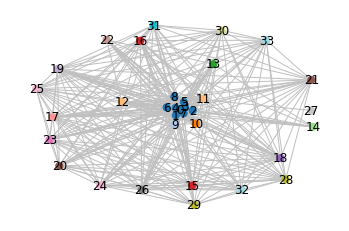

In [35]:
A2= nx.convert_matrix.to_scipy_sparse_array(G)
result2 = mc.run_mcl(A2)
clusters2 = mc.get_clusters(result2)
mc.draw_graph(A2, clusters2, node_size=50, with_labels=True, edge_color="silver")

In [36]:
inflation_lst=[]
for i in range(11,20):
    inflation_lst.append(i/10)

In [37]:
inflation_lst

[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]

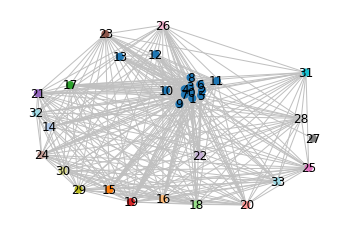

inflation: 1.1 modularity: 0.22491349480968853 Cluster Size :  21


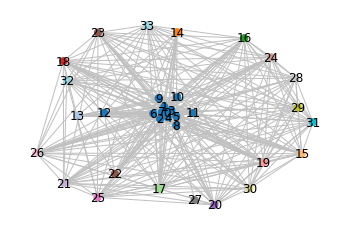

inflation: 1.2 modularity: 0.20934256055363315 Cluster Size :  23


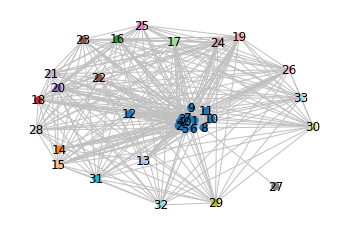

inflation: 1.3 modularity: 0.20934256055363315 Cluster Size :  23


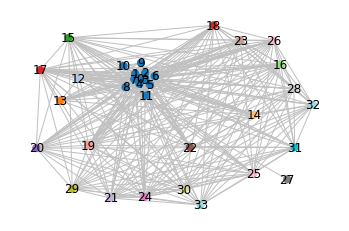

inflation: 1.4 modularity: 0.19896193771626303 Cluster Size :  24


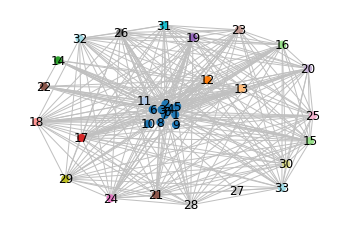

inflation: 1.5 modularity: 0.18685121107266436 Cluster Size :  25


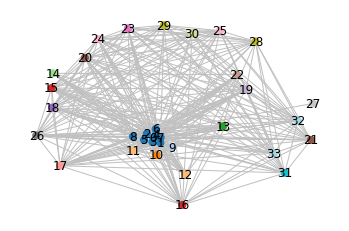

inflation: 1.6 modularity: 0.157439446366782 Cluster Size :  27


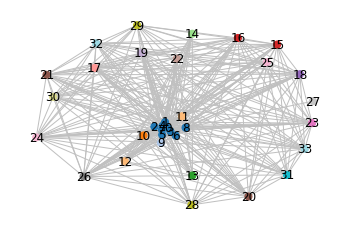

inflation: 1.7 modularity: 0.157439446366782 Cluster Size :  27


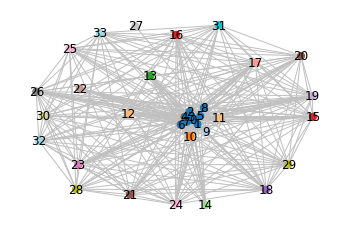

inflation: 1.8 modularity: 0.157439446366782 Cluster Size :  27


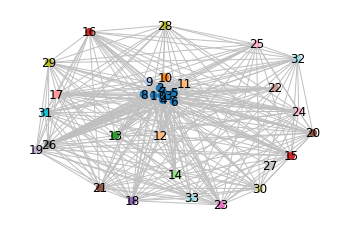

inflation: 1.9 modularity: 0.157439446366782 Cluster Size :  27


In [38]:
for i in inflation_lst:
    result = mc.run_mcl(A2, inflation=i)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
    mc.draw_graph(A2, clusters, node_size=50, with_labels=True, edge_color="silver")
    print("inflation:", i, "modularity:", Q, "Cluster Size : ",len(clusters))

In [39]:
clusters

[(0, 1, 2, 3, 4, 5, 6, 7),
 (8,),
 (9,),
 (10,),
 (11,),
 (12,),
 (13,),
 (14,),
 (15,),
 (16,),
 (17,),
 (18,),
 (19,),
 (20,),
 (21,),
 (22,),
 (23,),
 (24,),
 (25,),
 (26,),
 (27,),
 (28,),
 (29,),
 (30,),
 (31,),
 (32,),
 (33,)]

In [40]:
A2

<34x34 sparse array of type '<class 'numpy.float64'>'
	with 666 stored elements in Compressed Sparse Row format>

In [41]:
result2

<34x34 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Column format>

In [42]:
from networkx.algorithms.community import girvan_newman

In [43]:
def most_valuable_edge(g):
    return max(nx.edge_betweenness_centrality(g).items(), key=lambda x: x[1])[0]

comm = girvan_newman(G, most_valuable_edge=most_valuable_edge)

## girvan_newman으로 만든 iterator는 끝까지 가면 모두 1개 크기의 세트로 이루어진 커뮤니티 세트가 나옴 
for i, comms in enumerate(girvan_newman(G)):
    print('community set_{:0>2d}'.format(i))
    print("="*30)
    for i, c in enumerate(comms):
        print("community_{:0>2d}: {}".format(i, c))
    print("="*30)

community set_00
community_00: {'Racing', 'Indie', 'PhotoEditing', 'Action', '360V', 'Animation&Modeling', 'Design&Illustration', 'Simulation', 'GameDevelopment', 'Casual', 'SoftwareTraining', 'Gore', 'Sports', 'Nudity', 'FreetoPlay', 'Strategy', 'Short', 'WebPublishing', 'Adventure', 'Movie', 'MassivelyMultiplayer', 'RPG', 'Episodic', 'Accounting', 'Utilities', 'Violent', 'Education', 'VideoProduction', 'AudioProduction', 'Tutorial', 'Documentary', 'EarlyAccess', 'SexualContent'}
community_01: {'ActionGames'}
community set_01
community_00: {'Racing', 'Indie', 'PhotoEditing', 'Action', '360V', 'Animation&Modeling', 'Design&Illustration', 'Simulation', 'GameDevelopment', 'Casual', 'SoftwareTraining', 'Gore', 'Sports', 'Nudity', 'FreetoPlay', 'Strategy', 'Short', 'WebPublishing', 'Adventure', 'Movie', 'MassivelyMultiplayer', 'RPG', 'Episodic', 'Accounting', 'Utilities', 'Education', 'Violent', 'VideoProduction', 'AudioProduction', 'Tutorial', 'Documentary', 'EarlyAccess'}
community_01: {

In [44]:
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
if nx.is_connected(G): 
    for k in range(1,30):
        for i, community in enumerate(asyn_fluidc(G, k=k)):
            print("community_{:0>2d}: {}".format(i, community))
        print("="*40)
else:
    print("G가 not connected이면 실행안됨")

community_00: {'Racing', 'Indie', 'PhotoEditing', 'Action', '360V', 'Animation&Modeling', 'Design&Illustration', 'Simulation', 'GameDevelopment', 'Casual', 'SoftwareTraining', 'Gore', 'Sports', 'Nudity', 'FreetoPlay', 'Strategy', 'Short', 'WebPublishing', 'Adventure', 'Movie', 'MassivelyMultiplayer', 'ActionGames', 'Episodic', 'RPG', 'Accounting', 'Utilities', 'Education', 'Violent', 'VideoProduction', 'AudioProduction', 'Tutorial', 'Documentary', 'EarlyAccess', 'SexualContent'}
community_00: {'Indie', 'PhotoEditing', '360V', 'Animation&Modeling', 'Design&Illustration', 'GameDevelopment', 'Casual', 'SoftwareTraining', 'Short', 'WebPublishing', 'Movie', 'Episodic', 'Accounting', 'Utilities', 'Education', 'VideoProduction', 'AudioProduction', 'Tutorial', 'Documentary'}
community_01: {'Gore', 'Adventure', 'Racing', 'Violent', 'Action', 'Sports', 'MassivelyMultiplayer', 'ActionGames', 'Simulation', 'FreetoPlay', 'Strategy', 'Nudity', 'EarlyAccess', 'SexualContent', 'RPG'}
community_00: {'G

In [45]:
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
from networkx.algorithms.community import coverage, performance, modularity

coverage_lst, performance_lst, modularity_lst = [], [],[] 
for k in range(1, len(G.nodes())):
    communities = list(asyn_fluidc(G, k=k))
    coverage_lst.append( coverage(G, communities) )
    performance_lst.append( performance(G, communities) )
    modularity_lst.append( modularity(G, communities) )
## 그림에서 보는 것처럼 performance가 충분히 높아지고 변화의 폭이 줄어들고 
## coverage가 충분히 큰 정도에서 멈추면 될듯함. 
## 따라서 적당한 k는 아마도 2-3 정도 
plt.figure(figsize=(14, 6))
plt.plot(coverage_lst, 'o-', label='coverage')
plt.plot(performance_lst, '^--', label='performance')
plt.plot(modularity_lst, 's--', label='modularity')
plt.legend(fontsize=15)
plt.show()

ImportError: cannot import name 'coverage' from 'networkx.algorithms.community' (c:\Users\moonp\AppData\Local\Programs\Python\Python38\lib\site-packages\networkx\algorithms\community\__init__.py)

In [ ]:
community_lst = [] ## 커뮤니티 리스트 
coverage_lst, performance_lst, modularity_lst = [], [],[] 
## 커뮤니티가 얼마나 잘 뽑혔는지를 평가하는 지표

for i, comms in enumerate(girvan_newman(G)):
    ## performance의 변화폭이 많이 적어지면 더이상 cluster를 나누어도 이득이 없으므로 멈춤
    if i!=0 and abs(performance(G, comms) - performance_lst[-1])< 0.001:
        break
    else:
        community_lst.append(comms), 
        coverage_lst.append(coverage(G, comms)), performance_lst.append(performance(G, comms)),modularity_lst.append( modularity(G, communities) )

## performance, coverage의 값을 확인한 다음 
## performance의 변화 폭이 작고, coverage가 충분히 클 때까지 자름
plt.figure(figsize=(8, 4))
plt.plot(coverage_lst, label='coverage', marker='o', color='r')
plt.plot(performance_lst, marker='^', label='performance', color='b')
plt.plot(modularity_lst, 's--', label='modularity')
plt.legend(fontsize=15)
plt.show()

In [46]:
edge_labels = nx.get_edge_attributes(G, 'weight')

In [47]:
edge_labels

{('Indie', 'Simulation'): 0.4343585408674166,
 ('Indie', 'Strategy'): 0.41270563755770856,
 ('Indie', 'Action'): 0.9340009103322713,
 ('Indie', 'Adventure'): 0.9097470576760518,
 ('Indie', 'RPG'): 0.3990506534885233,
 ('Indie', 'EarlyAccess'): 0.259379673580857,
 ('Indie', 'Casual'): 1.0,
 ('Indie', 'FreetoPlay'): 0.1197737174068535,
 ('Indie', 'Sports'): 0.09350412900708759,
 ('Indie', 'Racing'): 0.07906886013394888,
 ('Indie', 'MassivelyMultiplayer'): 0.04649196956889264,
 ('Indie', 'Violent'): 0.005527017361336888,
 ('Indie', 'Gore'): 0.0030561154821509852,
 ('Indie', 'Animation&Modeling'): 0.0003901424019767215,
 ('Indie', 'Design&Illustration'): 0.0004551661356395084,
 ('Indie', 'Education'): 0.0009103322712790169,
 ('Indie', 'SoftwareTraining'): 0.0003251186683139346,
 ('Indie', 'Utilities'): 0.0005852136029650823,
 ('Indie', 'WebPublishing'): 0.00026009493465114765,
 ('Indie', 'VideoProduction'): 0.00026009493465114765,
 ('Indie', 'Nudity'): 0.0013004746732557383,
 ('Indie', 'Se

In [48]:
import networkx.algorithms.community.louvain as lvcm

""" Louvain method """
louv_com = lvcm.louvain_communities(G, weight='weight',seed=1234)
louv_part = lvcm.louvain_partitions(G, weight='weight',seed=1234)


In [51]:
louv_com

[{'Action',
  'Adventure',
  'Casual',
  'EarlyAccess',
  'Indie',
  'RPG',
  'Simulation',
  'Strategy'},
 {'ActionGames', 'FreetoPlay', 'MassivelyMultiplayer', 'Racing', 'Sports'},
 {'Gore', 'Nudity', 'SexualContent', 'Violent'},
 {'360V',
  'Accounting',
  'Animation&Modeling',
  'AudioProduction',
  'Design&Illustration',
  'Documentary',
  'Education',
  'Episodic',
  'GameDevelopment',
  'Movie',
  'PhotoEditing',
  'Short',
  'SoftwareTraining',
  'Tutorial',
  'Utilities',
  'VideoProduction',
  'WebPublishing'}]

In [50]:
louv_part

<generator object louvain_partitions at 0x000002028E9E3C80>